In [37]:
#Import libraries
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as iter
sb.set()
plt.show()

In [38]:
dataPull = pd.read_csv("cardio_train.csv", delimiter=";")
dataPull.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [39]:
dataPull.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [40]:
#This data is pulled from: 
#https://www.kaggle.com/code/bhargavi35/starter-cardiovascular-disease-dataset-d2fc2521-9

# Description
Features:

Age | Objective Feature | age | int (days) <br>
Height | Objective Feature | height | int (cm) |<br>
Weight | Objective Feature | weight | float (kg) |<br>
Gender | Objective Feature | gender | categorical code |<br>
Systolic blood pressure | Examination Feature | ap_hi | int |<br>
Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
Smoking | Subjective Feature | smoke | binary |<br>
Alcohol intake | Subjective Feature | alco | binary |<br>
Physical activity | Subjective Feature | active | binary |<br>
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br>

In [41]:
def filterOut(filter_cond : list, dataMatrix):
    k = [x for x in dataMatrix.columns if x not in filter_cond]
    return pd.DataFrame(dataMatrix[k])

In [42]:
#get rid of id, it is useless.
filter = ["ID ", "id", "id ", "ID"]
data = filterOut(filter, dataPull)
data.head(n = 20)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [43]:
#We need to change the categorical variables [gender, chol, gluc] and change the binary forms to TRUE and FALSE.
categorical = ['gender', 'cholesterol', 'gluc']
binForm = ["smoke", "alco", "active", "cardio"]
#to ease my life, I will make two functions. 
#Later I will map the gender column too, but be patient. 

In [44]:
def convertToBin(binary_slot : list, dataIn):
    #first, copy the dataframe so upstream doesn't suffer. 
    data_tmp = dataIn.copy()
    data_tmp[binary_slot] = data_tmp[binary_slot].astype('bool')
    return data_tmp #I do not care about SettingWithCopyWarning. 

In [45]:
testdata = convertToBin(binForm, data)
#double check. 
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  bool   
 9   alco         70000 non-null  bool   
 10  active       70000 non-null  bool   
 11  cardio       70000 non-null  bool   
dtypes: bool(4), float64(1), int64(7)
memory usage: 4.5 MB


In [46]:
#now the data is proper. Let me display it. 
testdata.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,False,False,True,False
1,20228,1,156,85.0,140,90,3,1,False,False,True,True
2,18857,1,165,64.0,130,70,3,1,False,False,False,True
3,17623,2,169,82.0,150,100,1,1,False,False,True,True
4,17474,1,156,56.0,100,60,1,1,False,False,False,False


In [47]:
#Now I convert ages to approx. years, and height to metres for standardization. 
r = testdata['age'] / 365.24
testdata['age'] = r.astype('int')
testdata['height'] /= 100

In [48]:
#Warning: This function will overwrite all instances of dataIn. Use at your own risk. 
def mapdat(dataIn, columns_in : list, map_from : list, map_to : list):
    for col in columns_in:
        for i in range(dataIn.shape[0]):
            content = dataIn[col][i]
            for j in range(len(map_from)):
                if content == map_from[j]:
                    content = map_to[j]
            dataIn[col][i] = content

In [49]:
categorical[1:]

['cholesterol', 'gluc']

In [50]:
#Then convert gender to actual gender
mapdat(testdata, [categorical[0]], map_from = [1, 2], map_to = ["Female", "Male"])
#Convert 1, 2, 3 to normal, above normal and well above normal. 
mapdat(testdata, categorical[1:], map_from = [1, 2, 3], map_to = ["Norm", "AbvNorm", "WellAbvNorm"])

C:\Users\TBNRd\AppData\Local\Temp\ipykernel_2404\1997139730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataIn[col][i] = content


In [51]:
#And we are now ready. 
testdata

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,Male,1.68,62.0,110,80,Norm,Norm,False,False,True,False
1,55,Female,1.56,85.0,140,90,WellAbvNorm,Norm,False,False,True,True
2,51,Female,1.65,64.0,130,70,WellAbvNorm,Norm,False,False,False,True
3,48,Male,1.69,82.0,150,100,Norm,Norm,False,False,True,True
4,47,Female,1.56,56.0,100,60,Norm,Norm,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,Male,1.68,76.0,120,80,Norm,Norm,True,False,True,False
69996,61,Female,1.58,126.0,140,90,AbvNorm,AbvNorm,False,False,True,True
69997,52,Male,1.83,105.0,180,90,WellAbvNorm,Norm,False,True,False,True
69998,61,Female,1.63,72.0,135,80,Norm,AbvNorm,False,False,False,True


# Exploratory Analysis
 First, we deal with the categorical variables. 

In [52]:
cat_data = pd.DataFrame(testdata[categorical])
bin_data = pd.DataFrame(testdata[binForm])
cat_data.head(n = 19)

,gender,cholesterol,gluc
0,Male,Norm,Norm
1,Female,WellAbvNorm,Norm
2,Female,WellAbvNorm,Norm
3,Male,Norm,Norm
4,Female,Norm,Norm
5,Female,AbvNorm,AbvNorm
6,Female,WellAbvNorm,Norm
7,Male,WellAbvNorm,WellAbvNorm
8,Female,Norm,Norm
9,Female,Norm,Norm


In [53]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       70000 non-null  object
 1   cholesterol  70000 non-null  object
 2   gluc         70000 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [54]:
cat_data.describe()

,gender,cholesterol,gluc
count,70000,70000,70000
unique,2,3,3
top,Female,Norm,Norm
freq,45530,52385,59479


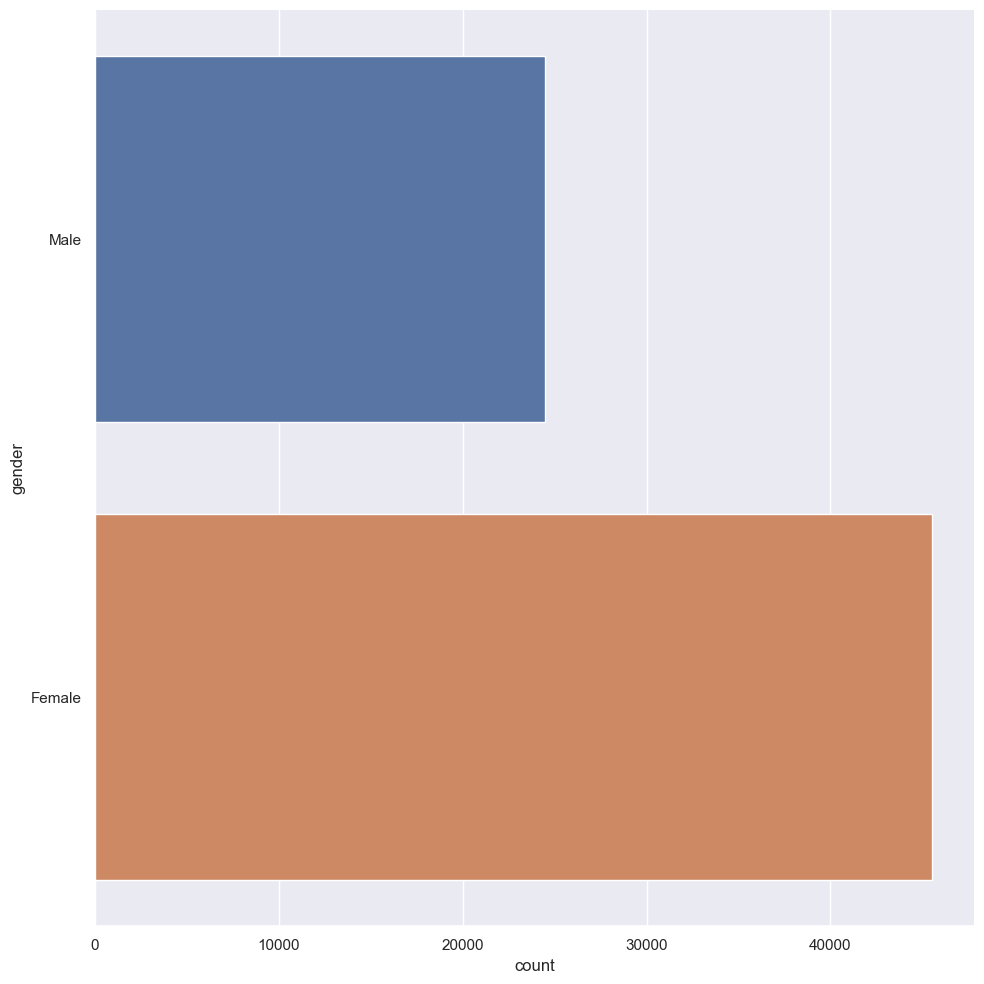

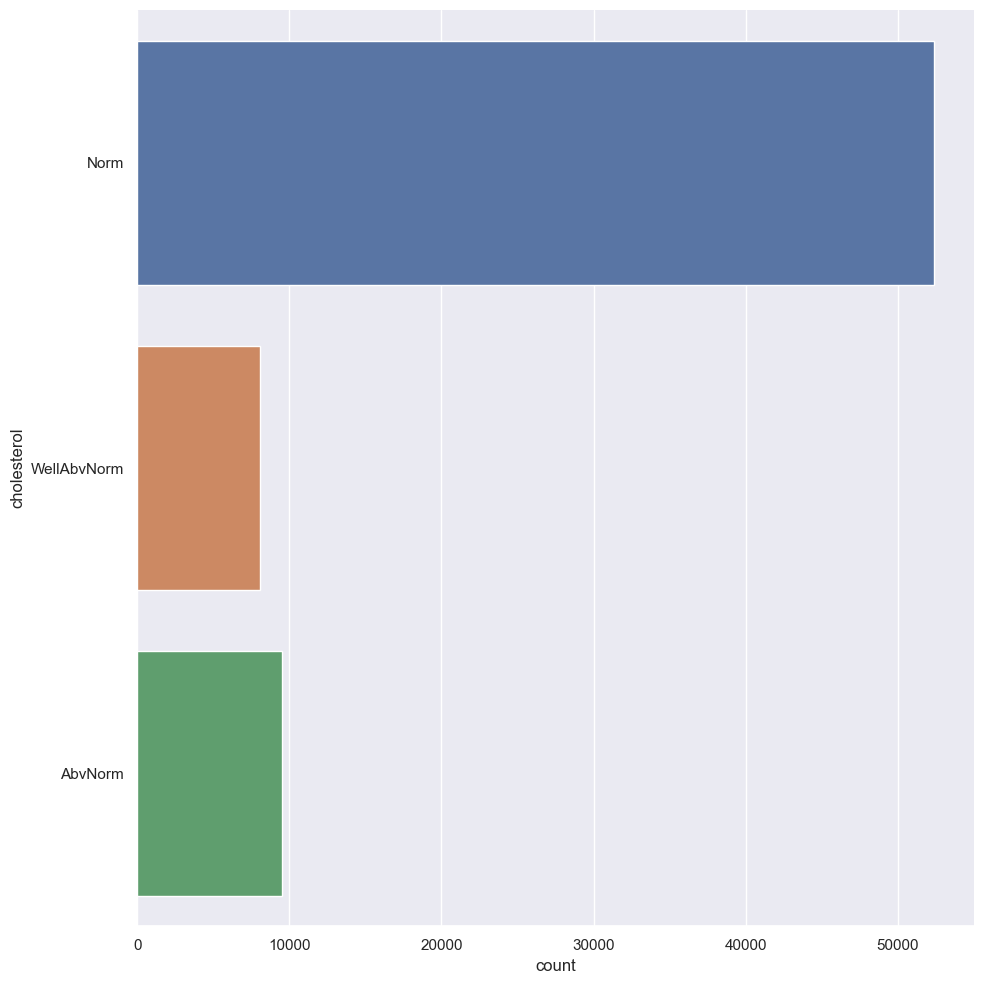

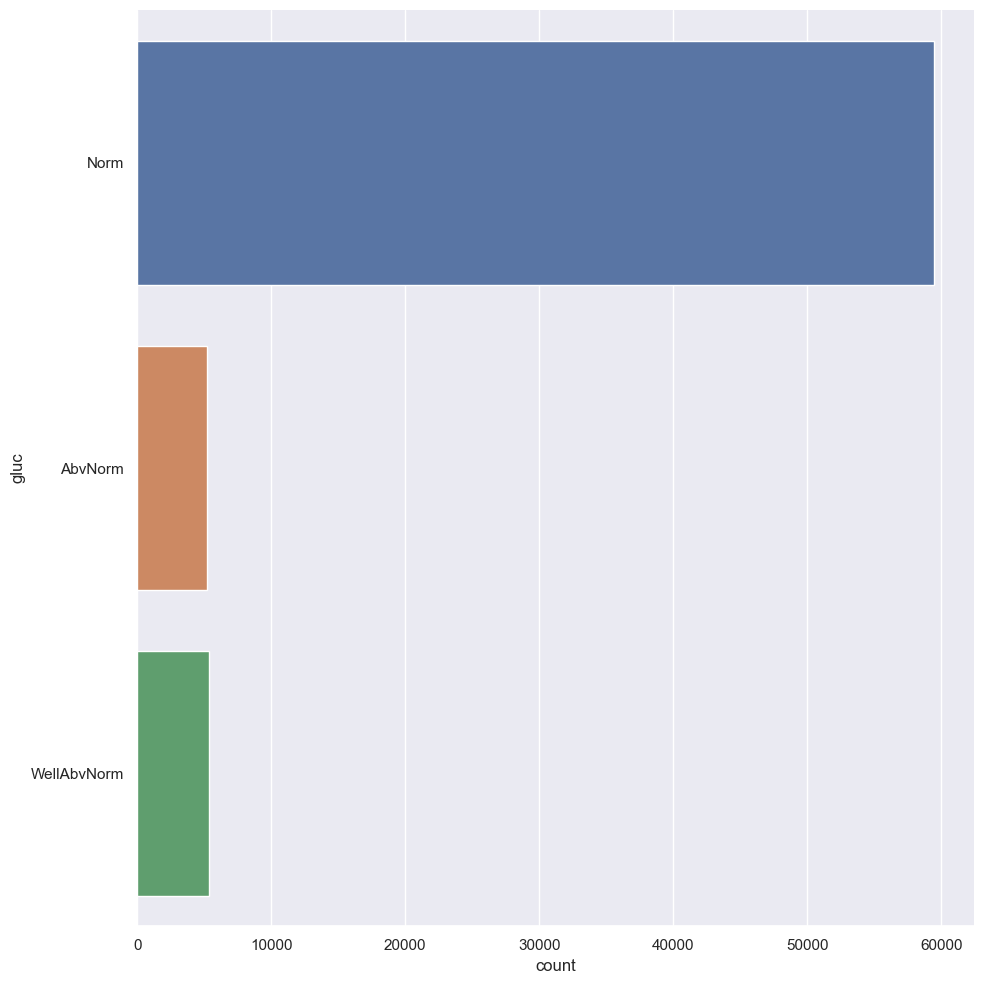

In [55]:
#catplot for all
for i in range(cat_data.shape[1]):
    sb.catplot(y = cat_data.columns[i], data = cat_data, kind = 'count', height = 10)

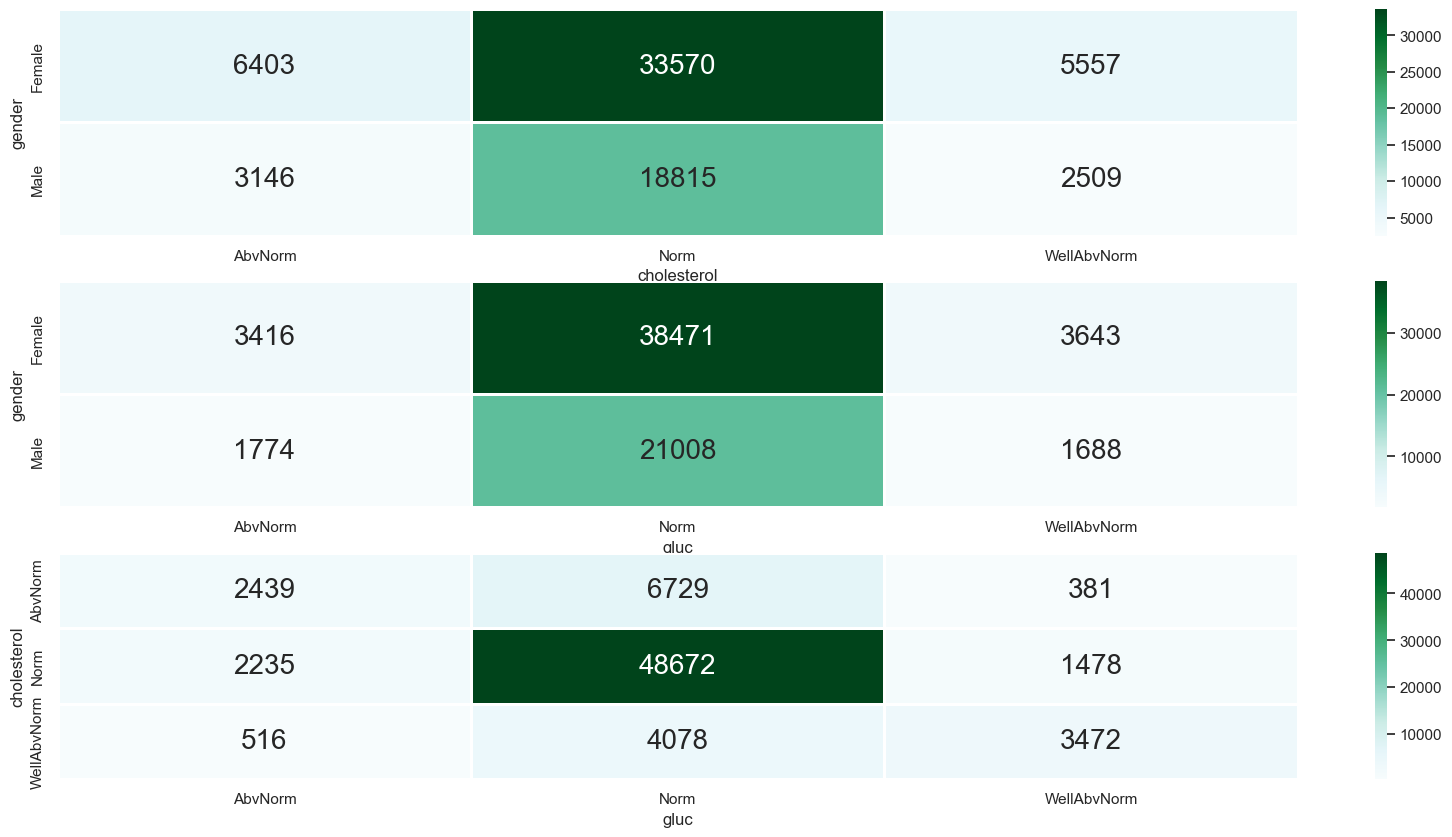

In [56]:
#get possible combinations
comby = list(iter.combinations(cat_data.columns, 2))
#then plot the heatmaps. 
f, axes = plt.subplots(3, 1, figsize = (20, 10))
for i in range(len(comby)):
    sb.heatmap(cat_data.groupby([comby[i][0], comby[i][1]]).size().unstack(),
               linewidths=1, annot=True, fmt='g', annot_kws={"size" : 20}, cmap = "BuGn", ax=axes[i])

Now I deal with the binary stuff

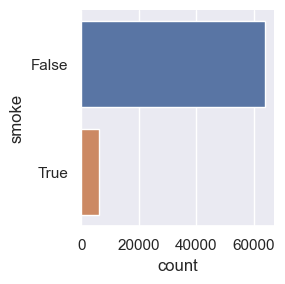

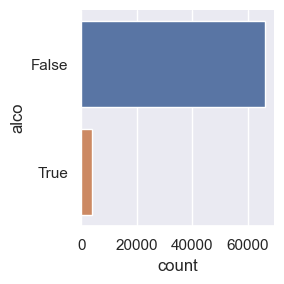

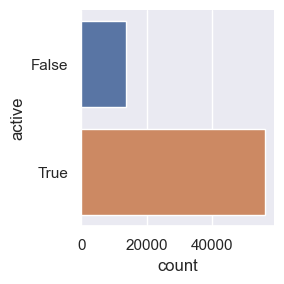

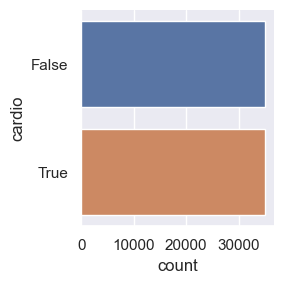

In [59]:
for col in binForm:
    sb.catplot(y = col, data = bin_data, height = 3, kind = 'count')

### TodoList:
1. Do data analysis for the non-categorical type(no end-goal)
2. Do 1, end goal is cardio
3. Do 1, end goal is gender
4. Do 1, end goal is chol
5. Do 1, end goal is gluc
6. ???